In [ ]:
import cartopy.crs as ccrs
import cartopy
import matplotlib.pyplot as plt
import netCDF4
import numpy as np
import os
import pandas as pd

In [2]:
#fields_file = "/glade/u/home/afox/work/jedi/jedi_exec_experiments/input/wrf_hydro_nwm_files/wrfinput.d01.conus_1km_NWMv2.1.nc"
fields_file = "/glade/u/home/afox/work/jedi/jedi_exec_experiments/input/wrf_hydro_nwm_files/geometry_nwm_long_range_snow.nc"

bkg_file = "/glade/u/home/afox/work/jedi/jedi_exec_experiments/input/wrf_hydro_nwm_files/RESTART.2017010100_sneqv_plus5_DOMAIN1_3dvar_input"
ana_file = "/glade/u/home/afox/work/jedi/jedi_exec_experiments/output/3dvar/test_analysis.nc"

In [3]:
field_name = "SNEQV" #"SNOWH"

In [4]:
model_layer = None

In [5]:
# Open the file
print('\nOpening ', fields_file, 'for reading')
ncfile = netCDF4.Dataset(fields_file, mode='r')


Opening  /glade/u/home/afox/work/jedi/jedi_exec_experiments/input/wrf_hydro_nwm_files/geometry_nwm_long_range_snow.nc for reading


In [6]:
# Get metadata from the file
npx = ncfile.dimensions["west_east"].size
npy = ncfile.dimensions["south_north"].size
npz = 1

In [7]:
lons = ncfile.variables["XLONG"][:]
lats = ncfile.variables["XLAT"][:]

In [8]:
# Print field dimensions
print(" Grid dimensions", npx, 'x', npy, 'x', npz)

 Grid dimensions 30 x 24 x 1


In [9]:
fields_file = ana_file

In [10]:
# Open the file
print('\nOpening ', fields_file, 'for reading')
ncfile = netCDF4.Dataset(fields_file, mode='r')


Opening  /glade/u/home/afox/work/jedi/jedi_exec_experiments/output/3dvar/test_analysis.nc for reading


In [11]:
 # Get field units from the file
#units = ncfile.variables[field_name].units
units = "mm"

In [12]:
# Zero out array to fill with field
field = np.zeros((npy, npx))

In [13]:
# Check if field is two or three dimensions
if len(ncfile.variables[field_name].shape) == 4:

      # User must provide layer/level to plot if 3D
      if (model_layer == None):
          utils.abort("If plotting 3D variable user must provide \'model layer\' in the configuration")

      # Message and read the field at provided layer
      print(" Reading layer ", model_layer, " from field ", field_name)
      field[:,:] = ncfile.variables[field_name][:,model_layer-1,:,:]

      # Set plot title and output file to include level plotted
      title = "Contour of "+field_name+" ("+units+") for layer "+str(model_layer)
      outfile = os.path.splitext(fields_file)[0]+"_"+field_name+"_layer-"+str(model_layer)+".png"

elif len(ncfile.variables[field_name].shape) == 3:

      # Message and read the field at provided layer
      print(" Reading field ", field_name)
      field[:,:] = ncfile.variables[field_name][:,:]
      title = "Contour of "+field_name+" ("+units+")"
      outfile = os.path.splitext(fields_file)[0]+"_"+field_name+".png"


 Reading field  SNEQV


In [14]:
analysis = field

In [15]:
fields_file = bkg_file

# Open the file
print('\nOpening ', fields_file, 'for reading')
ncfile = netCDF4.Dataset(fields_file, mode='r')

# Zero out array to fill with field
field = np.zeros((npy, npx))

# Check if field is two or three dimensions
if len(ncfile.variables[field_name].shape) == 4:

      # User must provide layer/level to plot if 3D
      if (model_layer == None):
          utils.abort("If plotting 3D variable user must provide \'model layer\' in the configuration")

      # Message and read the field at provided layer
      print(" Reading layer ", model_layer, " from field ", field_name)
      field[:,:] = ncfile.variables[field_name][:,model_layer-1,:,:]

      # Set plot title and output file to include level plotted
      title = "Contour of "+field_name+" ("+units+") for layer "+str(model_layer)
      outfile = os.path.splitext(fields_file)[0]+"_"+field_name+"_layer-"+str(model_layer)+".png"

elif len(ncfile.variables[field_name].shape) == 3:

      # Message and read the field at provided layer
      print(" Reading field ", field_name)
      field[:,:] = ncfile.variables[field_name][:,:]
      title = "Contour of "+field_name+" ("+units+")"
      outfile = os.path.splitext(fields_file)[0]+"_"+field_name+".png"


Opening  /glade/u/home/afox/work/jedi/jedi_exec_experiments/input/wrf_hydro_nwm_files/RESTART.2017010100_sneqv_plus5_DOMAIN1_3dvar_input for reading
 Reading field  SNEQV


In [16]:
increment = analysis - field

In [17]:
field = increment

In [18]:
# Check if field has positve and negative values
# ----------------------------------------------
if np.min(field) < 0:
      cmax = np.max(np.abs(field))
      cmin = -cmax
      cmap = 'RdBu'
else:
      cmax = np.max(field)
      cmin = np.min(field)
      cmap = 'nipy_spectral'

levels = np.linspace(cmin,cmax,250)


In [19]:
#cmax = np.max(field)
#cmin = np.min(field)
#cmax = 10
#cmin = -10
#cmap = 'nipy_spectral'

#levels = np.linspace(cmin,cmax,100)

#DANGER!!
field3 = np.clip(field, cmin, cmax)

In [20]:
#fig, ax = plt.subplots()
#hist = ax.hist(field, bins=200)

In [21]:
lats = np.squeeze(lats)
lons = np.squeeze(lons)

 Saving figure as World_/glade/u/home/afox/work/jedi/jedi_exec_experiments/input/wrf_hydro_nwm_files/RESTART_SNEQV.png 



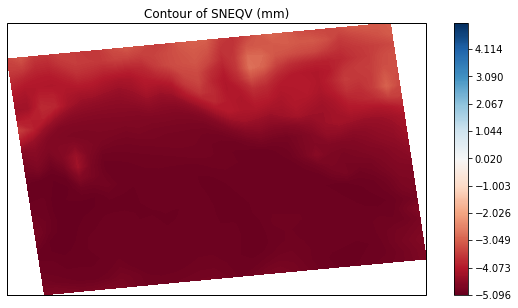

In [22]:
# Create two dimensional contour plot of field

# Set the projection
projection = ccrs.PlateCarree()

    # Create figure to hold plot
fig = plt.figure(figsize=(10, 5))

    # Just one subplot for now
ax = fig.add_subplot(1, 1, 1, projection=projection)

    # Contour the field
im = ax.contourf(lons, lats, field3,
                    transform=projection,
                     cmap=cmap,
                     levels=levels)

# Add coast lines to the plot
ax.coastlines()

# Add labels to the plot
#ax.set_xticks(np.linspace(-180, 180, 5), crs=projection)
#ax.set_yticks(np.linspace(-90, 90, 5), crs=projection)

ax.set_xlabel('Longitude')
ax.set_ylabel('Latitude')
ax.set_title(title)
#ax.set_global()

# Add a colorbar for the filled contour.
fig.colorbar(im)

# Show the figure
thisoutfile = "World_"+outfile
print(" Saving figure as", thisoutfile, "\n")
plt.savefig("test.png", facecolor='w', dpi = 400)

In [23]:
np.max(field3)

-2.82684326171875

In [24]:
np.min(field3)

-5.0960540771484375

 Saving figure as World_/glade/u/home/afox/work/jedi/jedi_exec_experiments/input/wrf_hydro_nwm_files/RESTART_SNEQV.png 



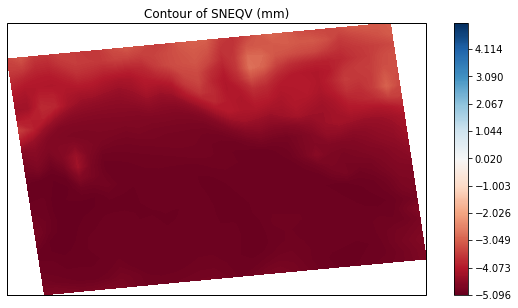

In [25]:
# Create two dimensional contour plot of field

# Set the projection
projection = ccrs.PlateCarree()

    # Create figure to hold plot
fig = plt.figure(figsize=(10, 5))

    # Just one subplot for now
ax = fig.add_subplot(1, 1, 1, projection=projection)

    # Contour the field
im = ax.contourf(lons, lats, field3,
                    transform=projection,
                     cmap=cmap,
                     levels=levels)

# Add coast lines to the plot
ax.coastlines()

ax.add_feature(cartopy.feature.STATES)

# Add labels to the plot
#ax.set_xticks(np.linspace(-180, 180, 5), crs=projection)
#ax.set_yticks(np.linspace(-90, 90, 5), crs=projection)

ax.set_xlabel('Longitude')
ax.set_ylabel('Latitude')
ax.set_title(title)
#ax.set_global()

# Add a colorbar for the filled contour.
fig.colorbar(im)

# Show the figure
thisoutfile = "World_"+outfile
print(" Saving figure as", thisoutfile, "\n")
#plt.savefig(thisoutfile, facecolor='w', dpi = 400)

In [26]:
!ls ..

3dvar_exp.o315144	       r100h500_swe_exp.o354831
config			       r100h500_swe_exp.o9496728
core-cheyenne4-16163-11506-11  r100h500_swe_exp.o9496834
core-cheyenne4-16163-16805-11  r100h500_swe_exp.o9511895
diagnostics		       run_3dvar.sh
hofx_exp.o305725	       run_3dvar_single_obs.sh
hofx_exp.o305907	       run_hofx3d.sh
input			       submit_3dvar.sh
logs			       submit_hofx3d.sh
output			       submit_script.sh
